In [1]:
from skimage import io
from skimage import img_as_ubyte
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.color import rgb2gray
from skimage.filters import median, gaussian, prewitt_h, \
    prewitt_v, prewitt,threshold_otsu
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    """
    convenience function to show two images side by side:
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

In [3]:
# exercise 1
img_dir = "data/"
img_name = "lego_5.png"
input_img = io.imread(img_dir + img_name)
gray_img = rgb2gray(input_img)

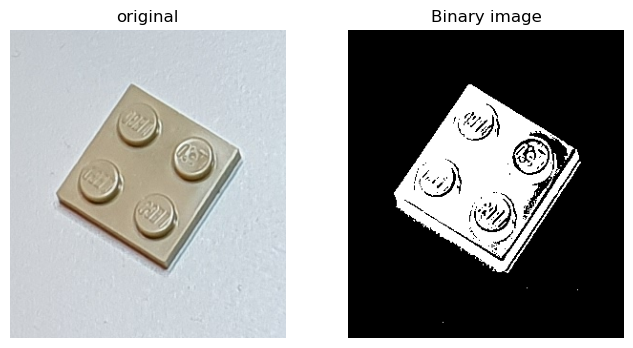

In [4]:
otsu_thres = threshold_otsu(gray_img)
bin_img = gray_img < otsu_thres
plot_comparison(input_img, bin_img, 'Binary image')


In [5]:
# Exercise 2
# create a structuring element, called footprint in scikit-image
# use skimage.morphology.erosion

footprint = disk(2)     # radius 2
# Check the size and shape of the structuring element
print(footprint)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


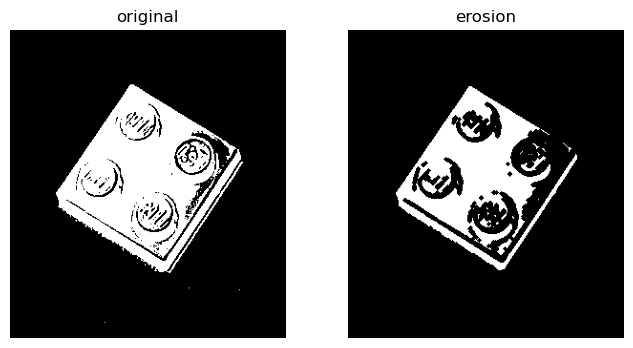

In [6]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

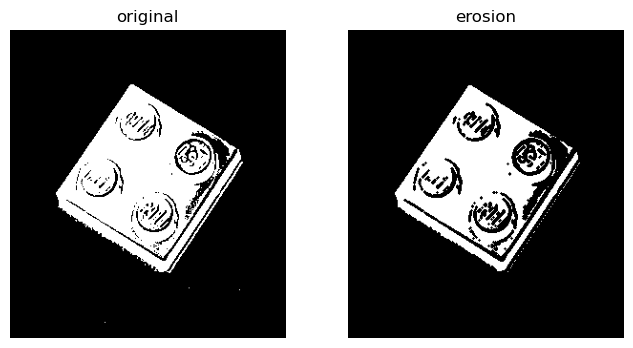

In [7]:
eroded = erosion(bin_img, disk(1))
plot_comparison(bin_img, eroded, 'erosion')

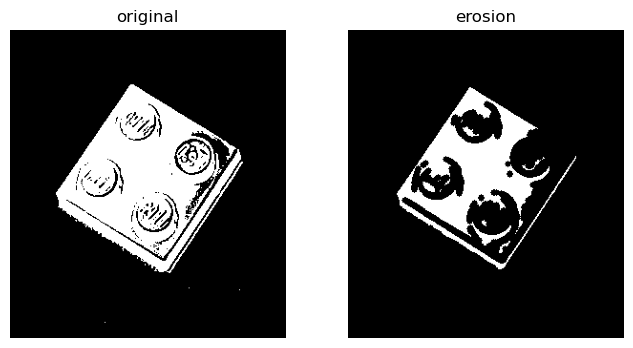

In [8]:
eroded = erosion(bin_img, disk(3))
plot_comparison(bin_img, eroded, 'erosion')

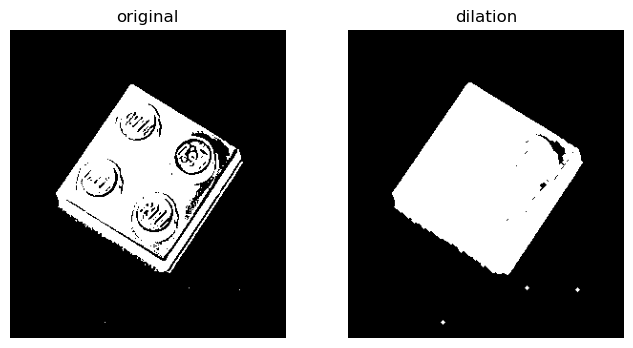

In [9]:
# Exercise 3
# use skimage.morphology.dilation

dilated = dilation(bin_img, disk(2))
plot_comparison(bin_img, dilated, 'dilation')

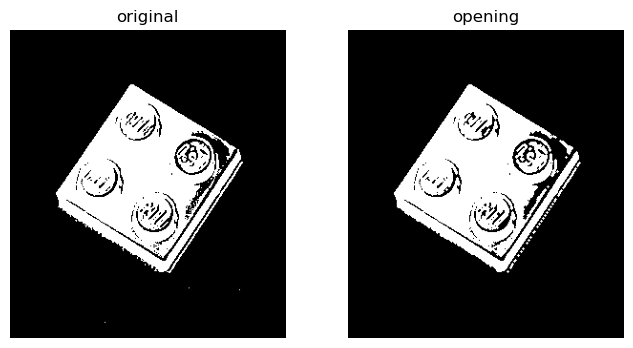

In [10]:
# Exercise 4
# use skimage.morphology.opening

opened = opening(bin_img, disk(1))
plot_comparison(bin_img, opened, 'opening')

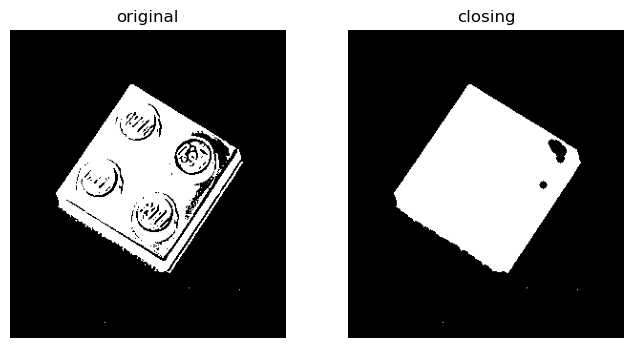

In [11]:
# Exercise 5
# use skimage.morphology.closing

closed = closing(bin_img, disk(4))
plot_comparison(bin_img, closed, 'closing')

In [12]:
# Exercise 6
# useful to compute the outline of an object both to measure the perimeter 
# but also to see if it contains holes or other types of noise

def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

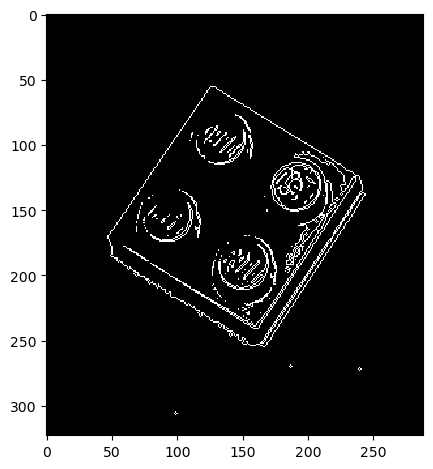

In [13]:
outline_img = compute_outline(bin_img)
io.imshow(outline_img)
io.show()

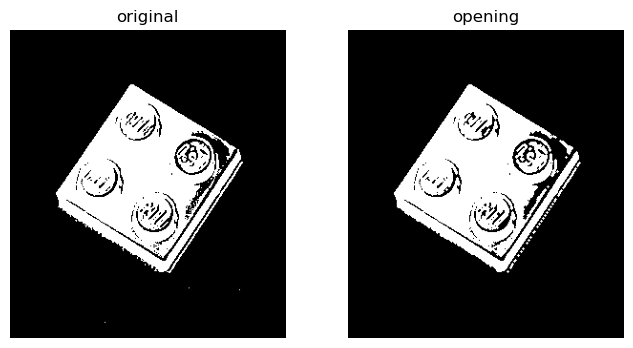

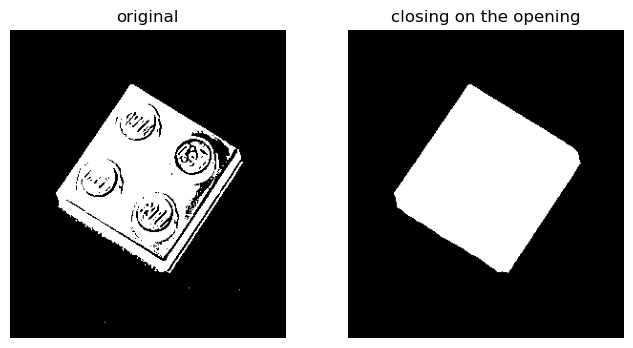

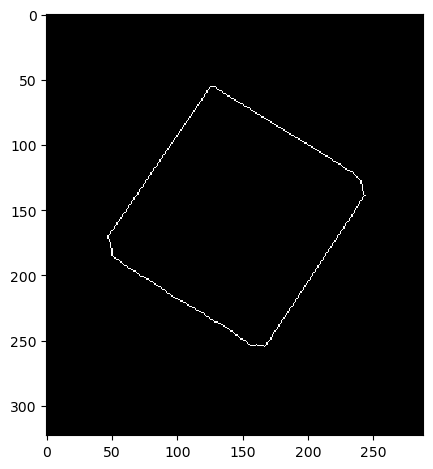

In [14]:
# open, close, compute opening

opened = opening(bin_img, disk(1))
plot_comparison(bin_img, opened, 'opening')

closed = closing(opened, disk(15))
plot_comparison(bin_img, closed, 'closing on the opening')

outline_img = compute_outline(closed)
io.imshow(outline_img)
io.show()

# this sequence tries to create a single blob to represent the lego

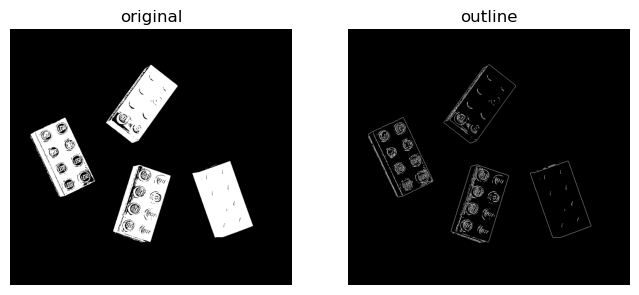

In [15]:
# Exercise 8

img_dir = "data/"
img_name = "lego_7.png"
input_img = io.imread(img_dir + img_name)

# convert to grayscale
gray_img = rgb2gray(input_img)

# use otsu's method to threshold the image into binary
otsu_thres = threshold_otsu(gray_img)
bin_img = gray_img < otsu_thres

# compute the outline image
outline_img = compute_outline(bin_img)
plot_comparison(bin_img, outline_img, 'outline')

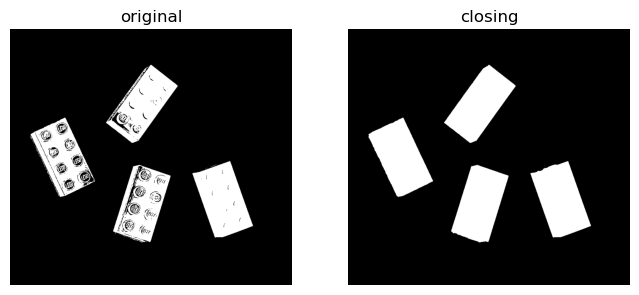

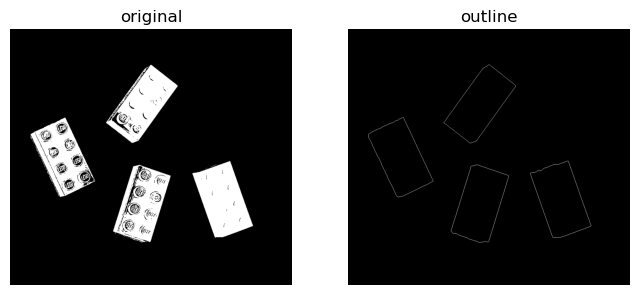

In [16]:
# Exercise 9
# find a way so only the outline of the entire brick is computed. 
# so for each lego brick there should only be one closed curve

closed = closing(bin_img, disk(10))
plot_comparison(bin_img, closed, 'closing')

# compute the outline image
outline_img = compute_outline(closed)
plot_comparison(bin_img, outline_img, 'outline')

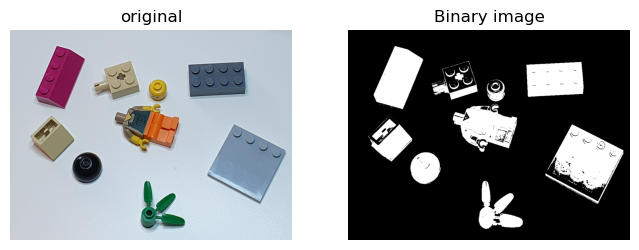

In [17]:
# Exercise 10
# try on another image
img_name = 'lego_3.png'
im_org = io.imread(f'{img_dir}{img_name}')
im_gray = rgb2gray(im_org)
thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')


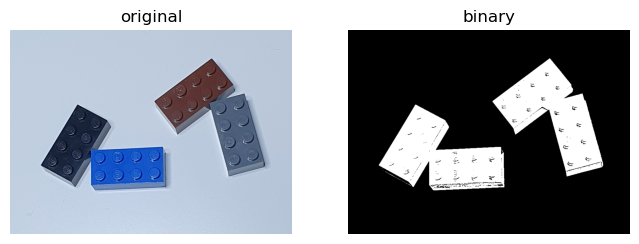

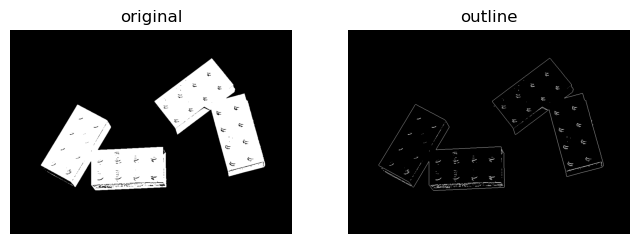

In [18]:
# Exercise 11

img_name = "lego_9.png"
input_img = io.imread(img_dir + img_name)

# convert to grayscale
gray_img = rgb2gray(input_img)

# use otsu's method to threshold the image into binary
otsu_thres = threshold_otsu(gray_img)
bin_img = gray_img < otsu_thres
plot_comparison(input_img, bin_img, 'binary')

# compute the outline image
outline_img = compute_outline(bin_img)
plot_comparison(bin_img, outline_img, 'outline')

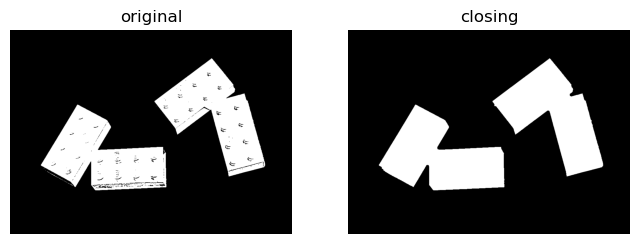

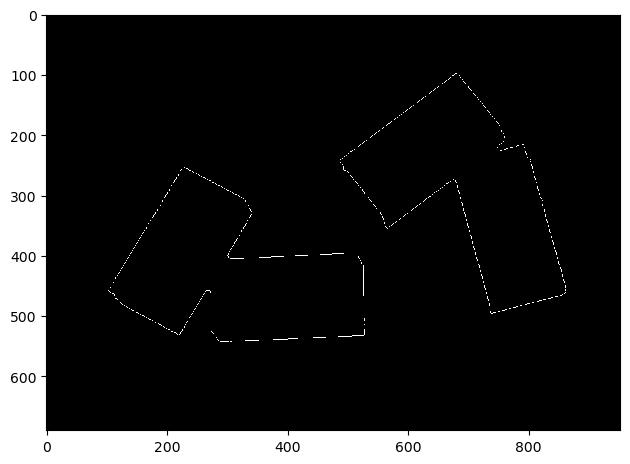

In [19]:
# Exercise 12
# remove noise inside the lego bricks

closed = closing(bin_img, disk(5))
plot_comparison(bin_img, closed, 'closing')

# compute the outline image
outline_img = compute_outline(closed)
io.imshow(outline_img)
io.show()

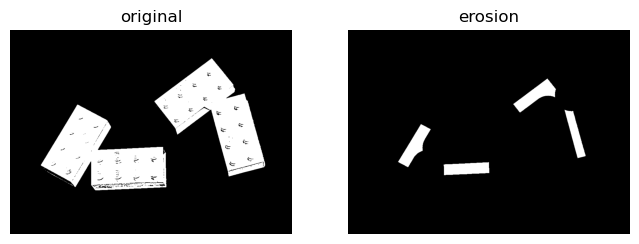

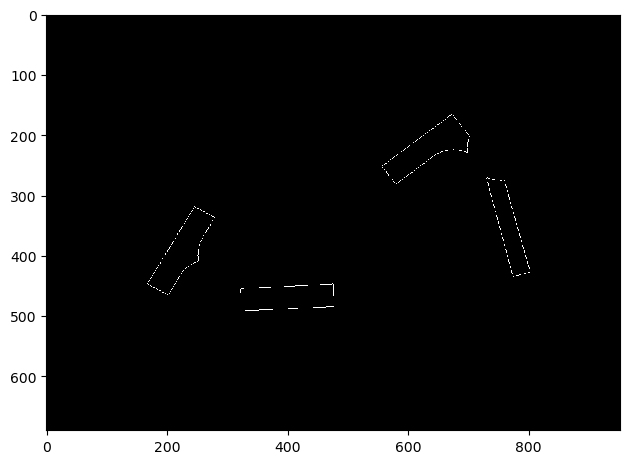

In [20]:
# Exercise 13
# separate the objects using erosion

eroded = erosion(closed, disk(50))
plot_comparison(bin_img, eroded, 'erosion')

# compute the outline image
outline_img = compute_outline(eroded)
io.imshow(outline_img)
io.show()

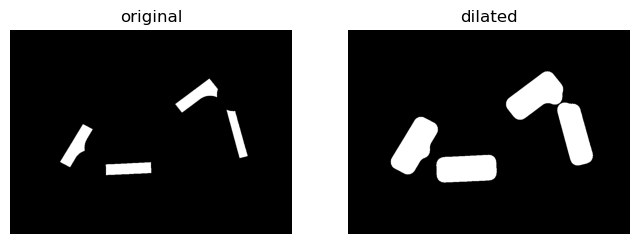

In [21]:
# Exercise 14
# use dilate to enlarge the objects and restore original size 
# before they start touching

dilated = dilation(eroded, disk(25))
plot_comparison(eroded, dilated, 'dilated')

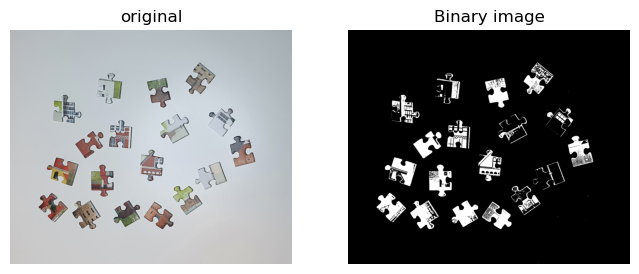

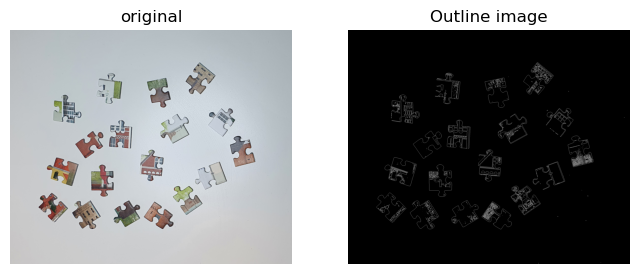

In [22]:
# Exercise 15
# compute binary photo of puzzle photo
img_name = 'puzzle_pieces.png'
img_org = io.imread(img_dir + img_name)
img_gray = rgb2gray(img_org)

thres = threshold_otsu(img_gray)
bin_img = img_gray < thres
plot_comparison(img_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(img_org, outline_img, 'Outline image')

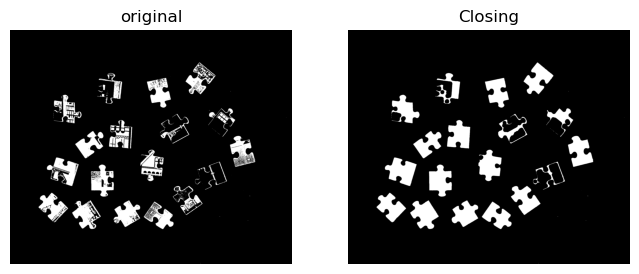

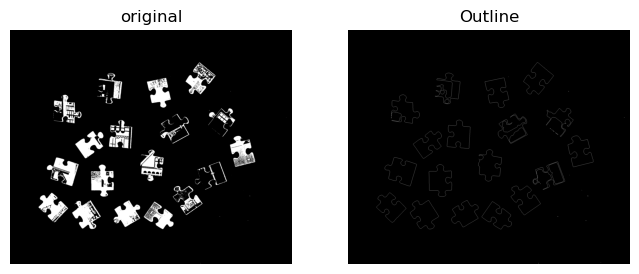

In [23]:
closed = closing(bin_img, disk(15))
plot_comparison(bin_img, closed, 'Closing')

outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'Outline')